## Introduction

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

## Dataset

The Data can be acquired from Kaggle and as well as UCI machine learning repository.

### Data Fields
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

datetime = test['datetime']

### Data Analysis

In [3]:
# head of training data
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# head of testing data
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
# shape of training set consist of 10886 rows and 12 columns
train.shape

(10886, 12)

In [6]:
# shape of test set consist of 6493 rows and 9 columns, it is goal to predict number of total rentals 'counts'
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     64

(None, None)

In [9]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

It seems that there is no missing value in training dataset as well in test data.
Let's explore the features of data for better understanding by plotting the target variable in relation with some independent features. We also have many catagorical variables in data set, let's see what they tell us

In [11]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [12]:
def barplot(x, y, title):
    sns.barplot(x = x, y = y)
    plt.title(title)

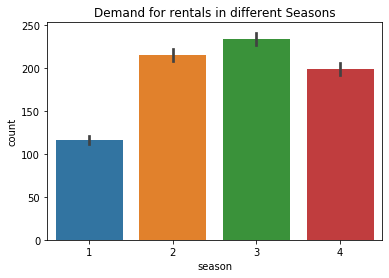

In [13]:
barplot(train['season'], train['count'], 'Demand for rentals in different Seasons')

- Spring = 1
- Summer = 2
- Fall = 3
- Winter = 4

From above graph it looks like that the rentals are highest in 3 and lowest in 1. We might assume that the rentals are highest in fall because that is between summer and winter, season is like a environmental friendly not harsh so that's why people likely to rent out bicycles, in winter because of traffic jams and snow may be it is more suitable for person to rent bicycles and harsh environment like temperature rentals are less because spring is between March - May in USA


##### Weather
- Clear, Few clouds, Partly cloudy, Partly cloudy  = 1
- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = 2
- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds = 3
- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = 4

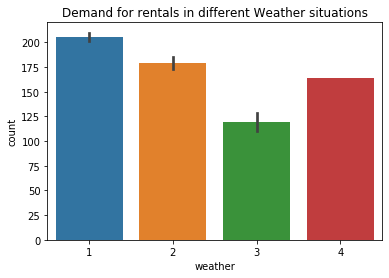

In [14]:
barplot(train['weather'], train['count'], 'Demand for rentals in different Weather situations')

In [15]:
# this means that data for rentals are mostly for working day

def factorplot(x, kind):
    sns.factorplot(x = x, data = train, kind = kind, size = 5, aspect = 1.5)
    plt.show()

/home/raheel/anaconda3/envs/test/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/raheel/anaconda3/envs/test/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


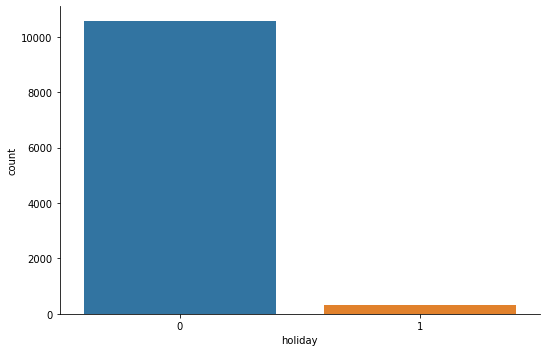

In [16]:
factorplot("holiday", "count")

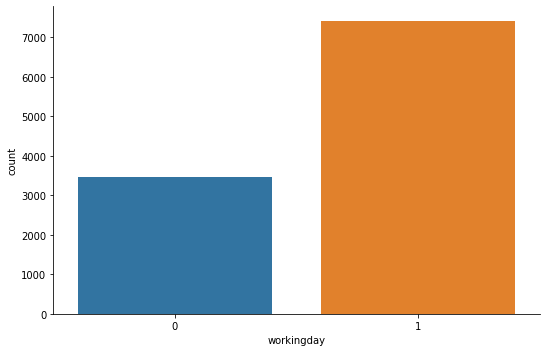

In [17]:
# as above majority of data is for working day as compared to holidays
factorplot("workingday", "count")

The 'datetime' feature is very useful in terms that it will tell us the demand for the rentals with respect to hour, day, week, etc. So we need to change the formatting of this feature and extract useful features

In [18]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train['dayofmonth'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month


test['datetime'] = pd.to_datetime(test['datetime'])

test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek
test['dayofmonth'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month

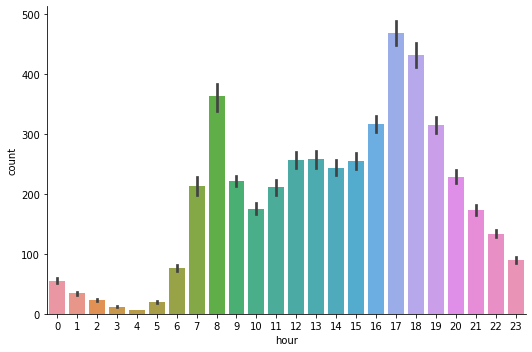

In [19]:
sns.factorplot(x = "hour", y = "count", data = train, kind = 'bar', size = 5, aspect = 1.5)
plt.show()

The highest demand is in hours from say 7-10 and the from 15-19. this is bcoz in most of the metroploitan cities this is the peak office time and so more people would be renting bikes. this is just one of the plausible reason

The month affects season and that effects wheteher people take bike or not. like climate conditions rainy,hazy etc.

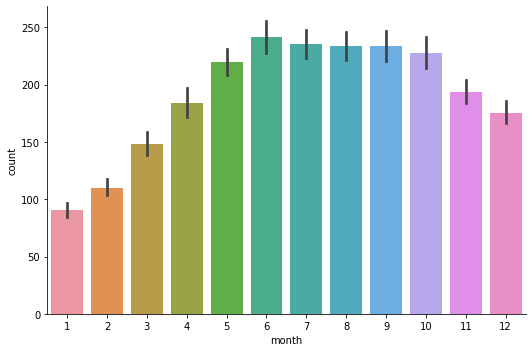

In [20]:
sns.factorplot(x = "month", y = "count", data = train, kind = 'bar', size = 5, aspect = 1.5)
plt.show()

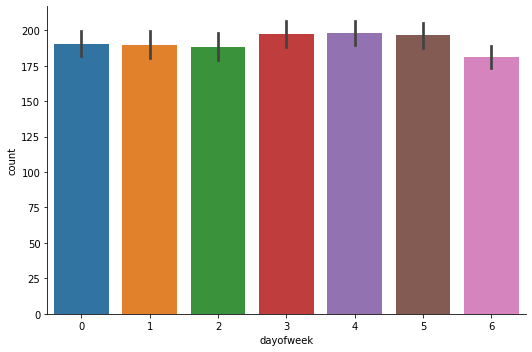

In [21]:
sns.factorplot(x = "dayofweek", y = "count", data = train, kind = 'bar', size = 5, aspect = 1.5)
plt.show()
# not giving us interesting information

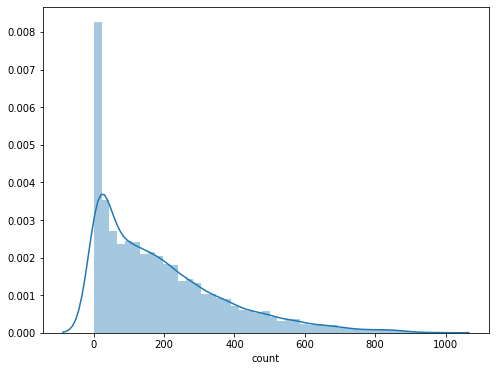

In [22]:
#let's plot our dependent variable to see if there is any skewness in data and it seems like that our data is
# positive skewed and let's deal with it with log
plt.figure(figsize = (8, 6))
sns.distplot(train['count'])
plt.show()

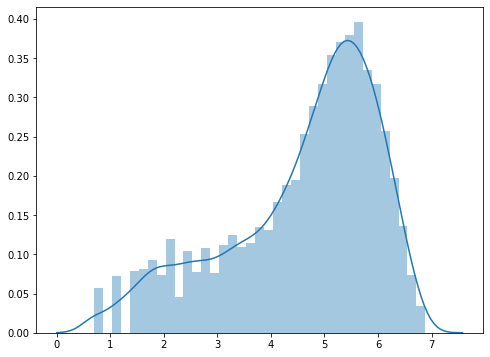

In [23]:
target = np.log(train['count'].values + 1)
plt.figure(figsize = (8, 6))
sns.distplot(target)
plt.show()

let's do some feature engineering to prepare data for model training

In [24]:
dummy_season = pd.get_dummies(train['season'], prefix = "season")
dummy_weather = pd.get_dummies(train['weather'], prefix = "weather")

dummy_season = pd.get_dummies(test['season'], prefix = "season")
dummy_weather = pd.get_dummies(test['weather'], prefix = "weather")

In [25]:
train_data = pd.concat([train, dummy_season, dummy_weather], axis = 1)

In [26]:
train_data = train_data.drop(['datetime', 'season', 'atemp', 'casual', 'registered', 'count', 'weather'], axis = 1)

In [27]:
train_data = train_data.fillna(0)

In [28]:
test_data = test

In [29]:
test_data = pd.concat([test, dummy_season, dummy_weather], axis = 1)

In [30]:
test_data = test_data.drop(['datetime', 'season', 'atemp', 'weather'], axis = 1)

In [31]:
test_data.head()

,holiday,workingday,temp,humidity,windspeed,hour,dayofweek,dayofmonth,month,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,1,10.66,56,26.0027,0,3,20,1,1,0,0,0,1,0,0,0
1,0,1,10.66,56,0.0000,1,3,20,1,1,0,0,0,1,0,0,0
2,0,1,10.66,56,0.0000,2,3,20,1,1,0,0,0,1,0,0,0
3,0,1,10.66,56,11.0014,3,3,20,1,1,0,0,0,1,0,0,0
4,0,1,10.66,56,11.0014,4,3,20,1,1,0,0,0,1,0,0,0


In [32]:
test_data.shape, train_data.shape

((6493, 17), (10886, 17))

In [33]:
lr = LinearRegression()
lr.fit(train_data, target)
lr.score(train_data, target)

0.482232127833432

In [34]:
DTR = DecisionTreeRegressor()
DTR.fit(train_data, target)
DTR.score(train_data, target)

1.0

In [35]:
GBR = GradientBoostingRegressor()
GBR.fit(train_data, target)
GBR.score(train_data, target)

0.9192953424696322

In [36]:
RFC = RandomForestRegressor()
RFC.fit(train_data, target)
RFC.score(train_data, target)

/home/raheel/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.990065045896443